In [1]:
%matplotlib inline

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from nose.tools import *

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, RocCurveDisplay
# Write your imports here

## Model Training and Improvement Demo

In [3]:
income_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income_data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "material-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]

income_data

,age,workclass,fnlwgt,education,education-num,material-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Transform Data

In [4]:
income_attributes = income_data.drop(columns="income_class")
income_classes = income_data.income_class

In [5]:
income_attributes

,age,workclass,fnlwgt,education,education-num,material-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [6]:
income_classes

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income_class, Length: 32561, dtype: object

In [7]:
income_attributes = pd.get_dummies(income_attributes, drop_first=True)

In [8]:
scaler = MinMaxScaler()
income_attributes = scaler.fit_transform(income_attributes)
income_attributes

array([[0.30136986, 0.0443019 , 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.0482376 , 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.28767123, 0.13811345, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.56164384, 0.09482688, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.06849315, 0.12849934, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.47945205, 0.18720338, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

#### Logistic Regression Model

In [9]:
logistic_regressiion = LogisticRegression(C = 1e9)
logistic_regressiion.fit(income_attributes, income_classes)

LogisticRegression(C=1000000000.0)

In [10]:
for C in [1e-10, 1e-6, 1e-5, 0.01, 0.1, 1, 10, 1e3, 1e6, 1e9]:
    logistic_regressiion = LogisticRegression(C = C)
    logistic_regressiion.fit(income_attributes, income_classes)
    print(C, "=>", logistic_regressiion.score(income_attributes, income_classes))
    print(set(logistic_regressiion.predict(income_attributes)))

1e-10 => 0.7591904425539756
{' <=50K'}
1e-06 => 0.7591904425539756
{' <=50K'}
1e-05 => 0.7591904425539756
{' <=50K'}
0.01 => 0.8348023709345536
{' <=50K', ' >50K'}
0.1 => 0.8428795184423082
{' <=50K', ' >50K'}
1 => 0.8527072264365345
{' <=50K', ' >50K'}
10 => 0.8534443045361014
{' <=50K', ' >50K'}
1000.0 => 0.8532907465986916
{' <=50K', ' >50K'}
1000000.0 => 0.8534443045361014
{' <=50K', ' >50K'}
1000000000.0 => 0.8532907465986916
{' <=50K', ' >50K'}


### Model training process

In [22]:
income_dataset = pd.concat([
    pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=", ", engine="python", header=None),
    pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', sep=", ", engine="python", header=None, skiprows=1)
])
income_dataset.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "material-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]

In [23]:
income_dataset.income_class = income_dataset.income_class.replace({">50K.": ">50K", "<=50K.": "<=50K"})

In [24]:
income_attributes = income_dataset.drop(columns="income_class")
income_classes = income_dataset.income_class

In [25]:
income_attributes = pd.get_dummies(income_attributes, drop_first=True)

In [26]:
scaler = MinMaxScaler()
income_attributes = scaler.fit_transform(income_attributes)
income_attributes.shape

(48842, 100)

In [34]:
income_attributes_train, income_attributes_test, income_classes_train, income_classes_test = train_test_split(
    income_attributes,
    income_classes,
    train_size=0.8, 
    test_size=0.2, 
    random_state=42, 
    stratify=income_classes
)

In [35]:
income_attributes_train.shape, income_attributes_test.shape, income_classes_train.shape, income_classes_test.shape 

((39073, 100), (9769, 100), (39073,), (9769,))

In [44]:
logistic_regressiion = LogisticRegression(C = 1)
logistic_regressiion.fit(income_attributes_train, income_classes_train)

LogisticRegression(C=1)

In [45]:
income_classes_train.value_counts() / len(income_classes_train)

income_class
<=50K    0.76073
>50K     0.23927
Name: count, dtype: float64

In [37]:
logistic_regressiion.score(income_attributes_train, income_classes_train)

0.8525836255214598

In [40]:
income_classes_test.value_counts() / len(income_classes_test)

income_class
<=50K    0.760672
>50K     0.239328
Name: count, dtype: float64

In [38]:
logistic_regressiion.score(income_attributes_test, income_classes_test)

0.8508547446002661

### Metrics

In [46]:
income_classes_predicted = logistic_regressiion.predict(income_attributes_test)

print(classification_report(income_classes_test, income_classes_predicted))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7431
        >50K       0.73      0.59      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.85      9769



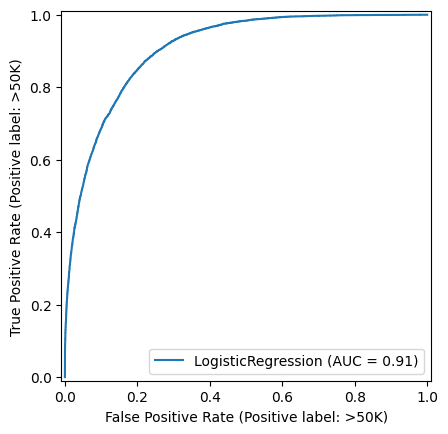

In [55]:
RocCurveDisplay.from_estimator(logistic_regressiion, income_attributes_train, income_classes_train)

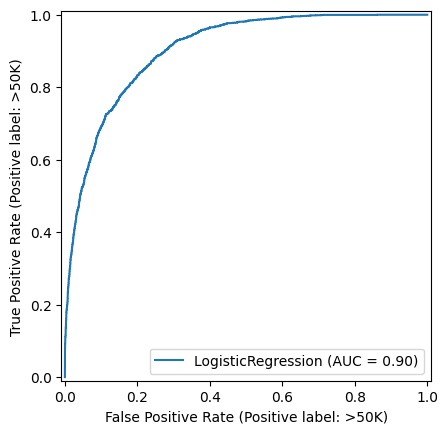

In [54]:
RocCurveDisplay.from_estimator(logistic_regressiion, income_attributes_test, income_classes_test)

In [57]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
     "C": [0.01, 0.1, 1, 10, 100],
     "fit_intercept": [True, False],
     "max_iter": [10, 100, 200]   
    }
)
grid_search.fit(income_attributes_test, income_classes_test)

c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 100, 200]})

In [62]:
print(
    # grid_search.best_estimator_.score(),
    grid_search.best_estimator_,
    grid_search.best_estimator_.fit_intercept,
    grid_search.best_estimator_.max_iter,
)
grid_search.cv_results_

LogisticRegression(C=100) True 100


{'mean_fit_time': array([0.07371869, 0.06516471, 0.06411371, 0.05336161, 0.05828333,
        0.04105101, 0.04183893, 0.07412577, 0.07922044, 0.04031696,
        0.06131439, 0.05745063, 0.03793898, 0.13132071, 0.12706852,
        0.04066434, 0.1024929 , 0.09631996, 0.03813601, 0.18011317,
        0.15390606, 0.03910418, 0.19965477, 0.22195978, 0.0407516 ,
        0.15769391, 0.16871552, 0.03761115, 0.20915008, 0.31743598]),
 'std_fit_time': array([0.02898349, 0.00512063, 0.00221045, 0.00336382, 0.00671048,
        0.00129869, 0.00288202, 0.00372602, 0.00493937, 0.00097746,
        0.00150297, 0.00170386, 0.00041166, 0.00858731, 0.01240591,
        0.00231604, 0.00892476, 0.00495272, 0.00154232, 0.0276277 ,
        0.01023513, 0.00319516, 0.00550249, 0.01320046, 0.00489542,
        0.01209673, 0.01242147, 0.00166145, 0.00949473, 0.0150506 ]),
 'mean_score_time': array([0.00449843, 0.00789294, 0.00582266, 0.0063241 , 0.00569592,
        0.00566754, 0.00511713, 0.00522413, 0.00539632, 0.00

In [64]:
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    n_iter=10,
    param_distributions={
     "C": [0.01, 0.1, 1, 10, 100],
     "fit_intercept": [True, False],
     "max_iter": [10, 100, 200]   
    }
)
random_search.fit(income_attributes_test, income_classes_test)

c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Boyko Boev\SoftUni-Machine-Learning-September-2022\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 200]})

In [65]:
print(
    # grid_search.best_estimator_.score(),
    random_search.best_estimator_,
    random_search.best_estimator_.fit_intercept,
    random_search.best_estimator_.max_iter,
)
random_search.cv_results_

LogisticRegression(C=100, fit_intercept=False, max_iter=200) False 200


{'mean_fit_time': array([0.24339633, 0.10367737, 0.04350576, 0.04144373, 0.03897076,
        0.15658469, 0.03912663, 0.05921564, 0.03782001, 0.33299165]),
 'std_fit_time': array([0.04572254, 0.00281334, 0.00203631, 0.00193149, 0.00201777,
        0.01158578, 0.00227017, 0.00133651, 0.00261206, 0.04278965]),
 'mean_score_time': array([0.00555229, 0.00550227, 0.00552526, 0.00555725, 0.00564904,
        0.00500379, 0.00512066, 0.00557637, 0.00535717, 0.00557852]),
 'std_score_time': array([0.00050474, 0.0004814 , 0.00056788, 0.00051939, 0.00050242,
        0.00038871, 0.00020841, 0.00024279, 0.00027976, 0.00074465]),
 'param_max_iter': masked_array(data=[200, 200, 200, 10, 10, 100, 10, 200, 10, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[False, False, False, True, False, True, True, False,
                    False, False],